## Importing all important libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

## Loading the Dataset 

In [2]:
df=pd.read_csv("ML case Study(course project dataset).csv" , header=0)
df_college=pd.read_csv("Colleges.csv" , header=0)
df_cities=pd.read_csv("cities.csv" , header=0)

## View few rows 

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [4]:
df_college

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus
5,IIT Roorkee,IIIT Lucknow,"KIIT, Bhubaneswar"
6,IIT Guwahati,MNNIT Allahabad,Amity University
7,IIIT Hyderabad,Punjab Engineering College,"BMS College, Bangalore"
8,BITS Pilani (Pilani Campus),DAIICT,"PES University, Bangalore"
9,IIT Indore,MNIT Jaipur,"USIT, Delhi"


In [5]:
df_cities

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


## STEP 1- DATA -PREPROCESSING

### Defining the TIERS in the Datatset into lists

In [6]:
Tier1 = df_college["Tier 1"].tolist()
Tier2 = df_college["Tier 2"].tolist()
Tier3 = df_college["Tier 3"].tolist()

### View the TIERS

In [7]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

## Categorize Colleges based on "TIERS" : change the college field into numerical data type with the help of the tier of that college


In [8]:
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)

In [9]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523,3,66,19,71406.58
1,2,Ajmer,Executive,57081,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,3,Ajmer,Executive,49010,2,81,33,82092.39
4,1,Durgapur,Executive,57879,4,74,32,73878.10


In [10]:
df.shape

(1589, 8)

## Categorize Cities :

In [11]:
Metro = df_cities["Metrio City"].tolist()
Non_Metro = df_cities["non-metro cities"].tolist()

In [12]:
for city in df.City:
    if city in Metro:
        df["City"].replace(city,1,inplace = True)
    elif city in Non_Metro:
        df["City"].replace(city,0,inplace = True)

In [13]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523,3,66,19,71406.58
1,2,0,Executive,57081,1,84,18,68005.87
2,3,0,Executive,60347,2,52,28,76764.02
3,3,0,Executive,49010,2,81,33,82092.39
4,1,0,Executive,57879,4,74,32,73878.10


## dummy variables for “Role”.

In [14]:
df=pd.get_dummies(df)

In [15]:
df

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523,3,66,19,71406.58,0,1
1,2,0,57081,1,84,18,68005.87,1,0
2,3,0,60347,2,52,28,76764.02,1,0
3,3,0,49010,2,81,33,82092.39,1,0
4,1,0,57879,4,74,32,73878.10,1,0
...,...,...,...,...,...,...,...,...,...
1584,1,1,61285,3,44,60,77283.59,1,0
1585,1,0,63140,1,44,24,68416.86,1,0
1586,1,1,44907,1,60,19,70186.19,1,0
1587,1,0,52054,2,67,29,73394.09,1,0


In [16]:
df.shape

(1589, 9)

## Finding missing values :

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   int64  
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Executive       1589 non-null   uint8  
 8   Role_Manager         1589 non-null   uint8  
dtypes: float64(1), int64(6), uint8(2)
memory usage: 90.1 KB


## There is no missing vaues :

In [18]:
df.isnull().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Executive         0
Role_Manager           0
dtype: int64

##  statistics value for numerical column : 

In [19]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.793581,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,1.000000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,1.000000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000,1.000000


## Checking Outliers : 

c:\users\arnav anand\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Graduation Marks'>

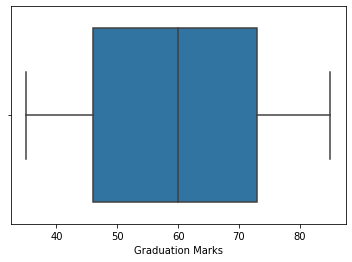

In [23]:
sns.boxplot(df['Graduation Marks'])

c:\users\arnav anand\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Previous CTC'>

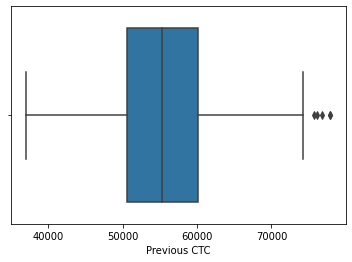

In [22]:
sns.boxplot(df['Previous CTC'])

c:\users\arnav anand\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CTC'>

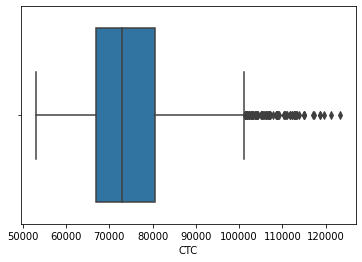

In [25]:
sns.boxplot(df['CTC'])

c:\users\arnav anand\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='EXP (Month)'>

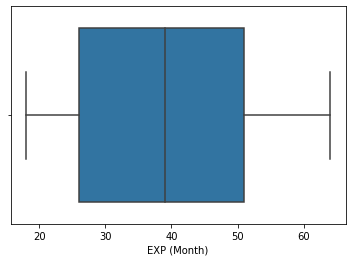

In [24]:
sns.boxplot(df['EXP (Month)'])

# Conclusion on Outliers: 
## -There is a minor outlier in the column names 'CTC' and 'Previous 'CTC'. 
## - As the outlier is an observation that appears far away and diverges from an overall pattern in dataset. 
## - Since there is no such outlier that will affect our data and will not make any huge difference while making prediction. So there is no need to treat any outlier.

# Correlation Matrix :

In [28]:
## Corelation between variables
corr = df.corr()
corr

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,0.014749,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,0.048671,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,-0.012321,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,0.017150,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,-0.017858,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,0.026751,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,-0.621311,0.621311
Role_Executive,0.014749,0.048671,-0.012321,0.017150,-0.017858,0.026751,-0.621311,1.000000,-1.000000
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,-1.000000,1.000000


In [29]:
## calculate correlation matrics
corr_matrix=df.corr()

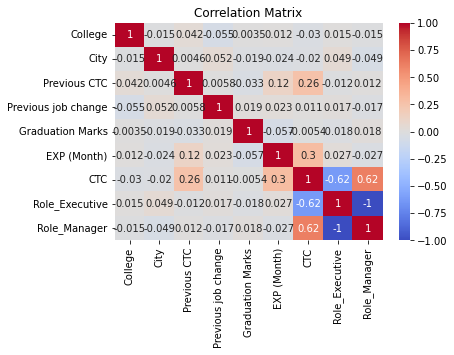

In [30]:
## Create a heatmap to visualize the correlations
sns.heatmap(corr_matrix , annot=True , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Regression Techniques :

## 1. Multi Linear Regression :
     

In [70]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 10)

In [1]:
## creating x variable (independent variable)
X_multi = df.loc[:, df.columns !="CTC"]

NameError: name 'df' is not defined

In [72]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,2,0,55523,3,66,19,0,1
1,2,0,57081,1,84,18,1,0
2,3,0,60347,2,52,28,1,0
3,3,0,49010,2,81,33,1,0
4,1,0,57879,4,74,32,1,0


In [73]:
## creating y variable (dependent variable)
y_multi = df['CTC']

In [74]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [75]:
## create constant
X_multi_cons = sn.add_constant(X_multi)

In [76]:
X_multi_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,1.0,2,0,55523,3,66,19,0,1
1,1.0,2,0,57081,1,84,18,1,0
2,1.0,3,0,60347,2,52,28,1,0
3,1.0,3,0,49010,2,81,33,1,0
4,1.0,1,0,57879,4,74,32,1,0


In [77]:
## fit our model
ml_multi_stats = sn.OLS(y_multi, X_multi_cons).fit()

In [78]:
ml_multi_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Thu, 06 Jun 2024   Prob (F-statistic):          4.70e-257
Time:                        13:38:11   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.211e+04   1463.780     21.936      0.000    2.92e+04     3.5e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Executive       6311.2273    760.861      8.295      0.000    4818.825    7803.630
Role_Manager          2.58e+04    797.098     32.366      0.000    2.42e+04    2.74e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     2.30e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.37e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
## create another object
m1_multi_lr = LinearRegression()

In [80]:
## fit our model
m1_multi_lr.fit(X_multi, y_multi)

LinearRegression()

In [81]:
print(m1_multi_lr.intercept_, m1_multi_lr.coef_)

48164.82373580207 [-4.81514705e+02  3.80830787e+02  4.10090279e-01  1.26565295e+02
  6.23621203e+00  2.61344394e+02 -9.74371393e+03  9.74371393e+03]


In [82]:
y_pred = m1_multi_lr.predict(X_multi)

In [83]:
mse = mean_squared_error(y_multi,y_pred)
r2 = r2_score(y_multi,y_pred)

In [161]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  57160448.59851348 
R2 Score = 0.6254768212048424


In [163]:
print(m1_multi_lr.intercept_)

48164.82373580207


## 2. Decision Tree Regressor 

In [144]:
X = df.loc[:,df.columns!="CTC"]

In [145]:
y = df["CTC"]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

In [147]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1271, 8) (318, 8) (1271,) (318,)


In [148]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [149]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [150]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [151]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [152]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  60424631.02613471 
R2 Score = 0.5927831611924914


In [153]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

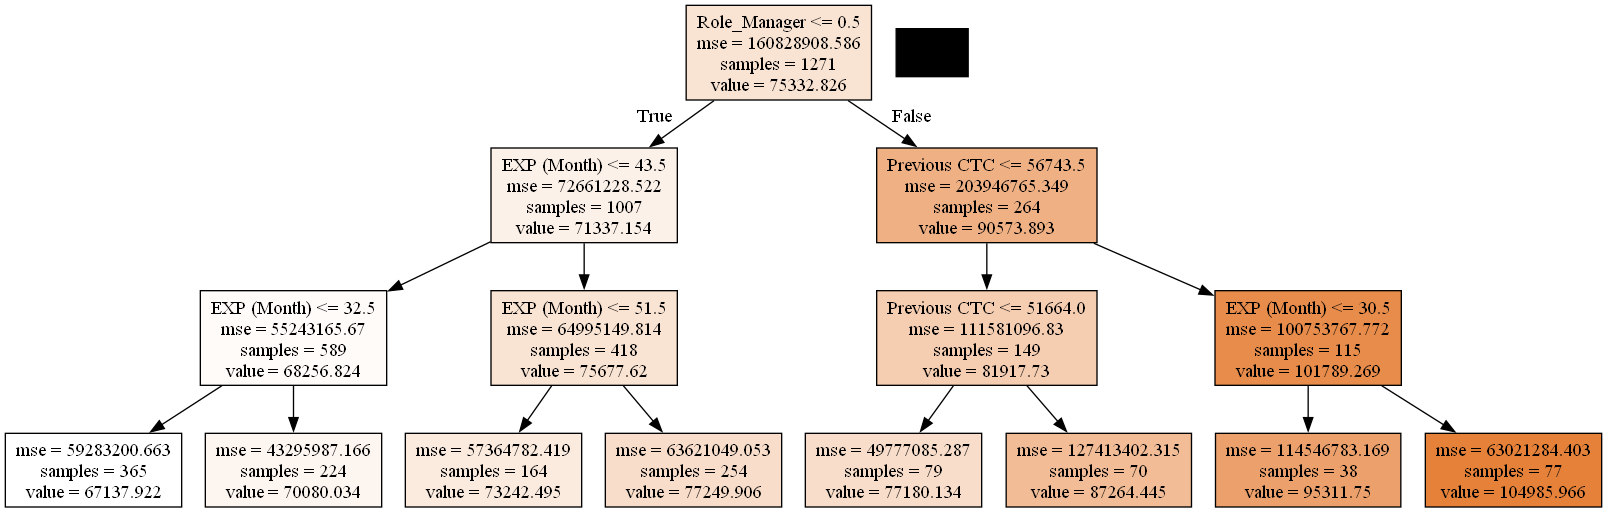

In [154]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## 3. Random Forest Regressor

In [155]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)  

In [156]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [157]:
predictions = rf.predict(X_test)

In [158]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [159]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  50230097.349703275 
R2 Score = 0.6614866965940986


In [160]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [161]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [162]:
pred = model.predict(X_test)

In [163]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

In [164]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  54502725.99793167 
R2 Score = 0.6326923737826373


## 4. XGBoost Regressor 

In [165]:
m5 = XGBRegressor(n_estimators = 250, max_depth = 5, learning_rate = 0.1)

In [166]:
m5.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [167]:
pred = m5.predict(X_test)

In [168]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

In [169]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  54611189.14315933 
R2 Score = 0.6319614132723841


## 5. Ridge Regressor

### Standarlising our data

In [85]:
## create scaler object which will store the scaling information for our x variable
scaler =StandardScaler()

In [86]:
scaler.fit(X_train)

StandardScaler()

In [87]:
## transform x_train into x_train_scale
X_train_s = scaler.transform(X_train)

In [88]:
## transform x_test into x_test_scale
X_test_s = scaler.transform(X_test)

In [89]:
## run simple ridge regression
lm_r = Ridge(alpha = 0.5)

In [90]:
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [179]:
y_pred = lm_r.predict(X_test_s)

In [180]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [181]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  68910404.93750554 
R2 Score = 0.5355953891144283


### Changing Hyperparameters

In [92]:
## creating array for λ value
param_range = np.logspace(-2,8,100)

In [93]:
## run iteration for our model
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [95]:
print(train_scores)
print(test_scores)

[[5.42929238e-01 5.54914288e-01 5.40195527e-01 5.61157913e-01
  5.17227287e-01]
 [5.42929238e-01 5.54914288e-01 5.40195527e-01 5.61157912e-01
  5.17227287e-01]
 [5.42929238e-01 5.54914288e-01 5.40195527e-01 5.61157912e-01
  5.17227287e-01]
 [5.42929237e-01 5.54914288e-01 5.40195527e-01 5.61157912e-01
  5.17227287e-01]
 [5.42929237e-01 5.54914288e-01 5.40195527e-01 5.61157912e-01
  5.17227286e-01]
 [5.42929237e-01 5.54914288e-01 5.40195527e-01 5.61157912e-01
  5.17227286e-01]
 [5.42929237e-01 5.54914288e-01 5.40195527e-01 5.61157912e-01
  5.17227286e-01]
 [5.42929237e-01 5.54914288e-01 5.40195526e-01 5.61157912e-01
  5.17227286e-01]
 [5.42929237e-01 5.54914288e-01 5.40195526e-01 5.61157912e-01
  5.17227286e-01]
 [5.42929236e-01 5.54914287e-01 5.40195526e-01 5.61157911e-01
  5.17227285e-01]
 [5.42929235e-01 5.54914286e-01 5.40195525e-01 5.61157910e-01
  5.17227285e-01]
 [5.42929234e-01 5.54914285e-01 5.40195523e-01 5.61157909e-01
  5.17227283e-01]
 [5.42929232e-01 5.54914283e-01 5.401955

In [96]:
## mean score of test and train score
train_mean = np.mean(train_scores, axis = 1)

In [116]:
train_mean
test_mean

array([ 5.31796064e-01,  5.31796099e-01,  5.31796143e-01,  5.31796198e-01,
        5.31796268e-01,  5.31796356e-01,  5.31796467e-01,  5.31796608e-01,
        5.31796785e-01,  5.31797008e-01,  5.31797290e-01,  5.31797645e-01,
        5.31798092e-01,  5.31798656e-01,  5.31799366e-01,  5.31800261e-01,
        5.31801386e-01,  5.31802802e-01,  5.31804581e-01,  5.31806813e-01,
        5.31809610e-01,  5.31813109e-01,  5.31817474e-01,  5.31822905e-01,
        5.31829633e-01,  5.31837925e-01,  5.31848076e-01,  5.31860387e-01,
        5.31875134e-01,  5.31892495e-01,  5.31912432e-01,  5.31934482e-01,
        5.31957418e-01,  5.31978697e-01,  5.31993581e-01,  5.31993766e-01,
        5.31965286e-01,  5.31885363e-01,  5.31717798e-01,  5.31406417e-01,
        5.30866102e-01,  5.29971112e-01,  5.28540864e-01,  5.26324326e-01,
        5.22985660e-01,  5.18095775e-01,  5.11136472e-01,  5.01524866e-01,
        4.88664458e-01,  4.72024190e-01,  4.51238084e-01,  4.26207405e-01,
        3.97178940e-01,  

In [100]:
## highest r2 value
max(test_mean)

0.5319937657612631

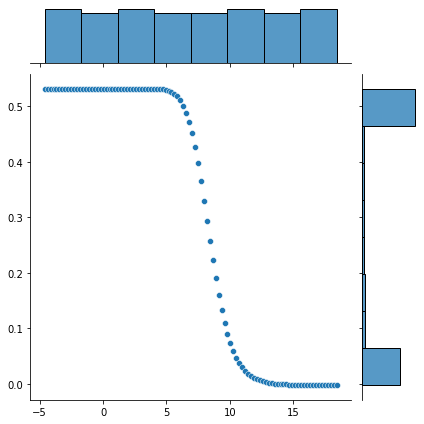

In [102]:
## visual representation to look r2 value 
sns.jointplot(x=np.log(param_range),y = test_mean)

In [104]:
## location of max-test-mean
np.where(test_mean == max(test_mean))

(array([35], dtype=int64),)

In [191]:
param_range[30]

10.722672220103231

In [105]:
## λ value of max_test_mean
lm_r_best = Ridge(alpha = param_range[30])

In [106]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

In [125]:
y_pred_best = lm_r.predict(X_test_s)

In [126]:
r2_score(y_test,y_pred_best)

0.4958925604139547

## 6. Lasso Regressor

In [196]:
lm_s = Lasso(alpha = 0.5)

In [197]:
lm_s.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [198]:
y_pred = lm_s.predict(X_test_s)

In [199]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [200]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  68908896.5345529 
R2 Score = 0.5356055546226256


### Changing Hyperparameters

In [109]:
## creating array for λ value
param_range = np.logspace(-2,8,100)

In [110]:
## run iteration for our model
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [111]:
print(train_scores)
print(test_scores)

[[0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722729]
 [0.54292924 0.55491429 0.54019553 0.56115791 0.51722728]
 [0.54292923 0.55491429 0.54019552 0.56115791 0.51722728]
 [0.54292923 0.55491428 0.54019552 0.56115791 0.51722728]
 [0.54292923 0.55491428 0.54019552 0.56115791 0.51722728]
 [0.54292923 0

In [114]:
## mean score of test and train score
train_mean = np.mean(train_scores, axis = 1)

In [115]:
train_mean
test_mean

array([ 5.31796064e-01,  5.31796099e-01,  5.31796143e-01,  5.31796198e-01,
        5.31796268e-01,  5.31796356e-01,  5.31796467e-01,  5.31796608e-01,
        5.31796785e-01,  5.31797008e-01,  5.31797290e-01,  5.31797645e-01,
        5.31798092e-01,  5.31798656e-01,  5.31799366e-01,  5.31800261e-01,
        5.31801386e-01,  5.31802802e-01,  5.31804581e-01,  5.31806813e-01,
        5.31809610e-01,  5.31813109e-01,  5.31817474e-01,  5.31822905e-01,
        5.31829633e-01,  5.31837925e-01,  5.31848076e-01,  5.31860387e-01,
        5.31875134e-01,  5.31892495e-01,  5.31912432e-01,  5.31934482e-01,
        5.31957418e-01,  5.31978697e-01,  5.31993581e-01,  5.31993766e-01,
        5.31965286e-01,  5.31885363e-01,  5.31717798e-01,  5.31406417e-01,
        5.30866102e-01,  5.29971112e-01,  5.28540864e-01,  5.26324326e-01,
        5.22985660e-01,  5.18095775e-01,  5.11136472e-01,  5.01524866e-01,
        4.88664458e-01,  4.72024190e-01,  4.51238084e-01,  4.26207405e-01,
        3.97178940e-01,  

In [117]:
## ## highest r2 value
max(test_mean)

0.5319937657612631

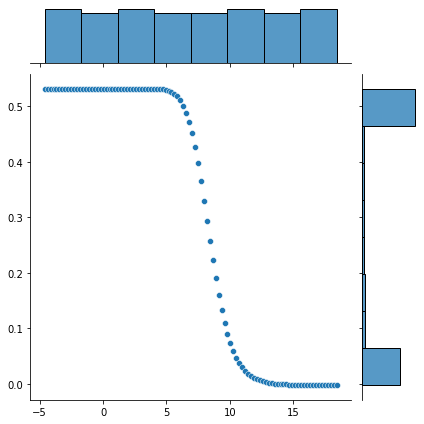

In [118]:
## visual representation to look r2 value 
sns.jointplot(x=np.log(param_range),y = test_mean)

In [119]:
## location of max-test-mean
np.where(test_mean == max(test_mean))

(array([35], dtype=int64),)

In [208]:
param_range[36]

43.28761281083057

In [121]:
## λ value of max_test_mean
lm_s_best = Lasso(alpha = param_range[36])

In [122]:
lm_s_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

In [129]:
y_pred_best = lm_s_best.predict(X_test_s)

In [130]:
r2_score(y_test,y_pred_best)

0.4966365316641802

## 7. Gradient Boosting Machine

In [131]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 42)

In [132]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=42)

In [133]:
pred = model.predict(X_test)

In [134]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

In [135]:
print("Mean Squared Error = ",mse,
      "\nR2 Score =",r2)

Mean Squared Error =  57160448.59851348 
R2 Score = 0.6254768212048424


# Finding Best Parameter for model

In [136]:
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [145]:
rnd=RandomForestRegressor()

In [149]:
rnd_tuned = RandomForestRegressor(n_jobs=-1, max_features=5, min_samples_split=3)

In [151]:
rnd_tuned.fit(X_train, y_train)


RandomForestRegressor(max_features=5, min_samples_split=3, n_jobs=-1)

In [152]:
rnd_tuned_pred = rnd_tuned.predict(X_test)

In [153]:
print("r2_score:",r2_score(y_test, rnd_tuned_pred))

r2_score: 0.6329598124030402


In [155]:
print("MSE:", mean_squared_error(y_test, rnd_tuned_pred))

MSE: 56018380.075214796


In [156]:
params_grid = {"max_features": [4,5,6,7,8,9,10],
              "min_samples_split": [2,3,10]}

In [157]:
grid_search = GridSearchCV(rnd_tuned, params_grid, n_jobs=-1, cv=5)

In [158]:
grid_search.fit(X_train, y_train)

c:\users\arnav anand\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.62437793 0.62381474 0.62428005 0.62169587 0.62083592 0.62245746
 0.61897426 0.6185634  0.618369   0.61259429 0.61286194 0.61503224
 0.61094375 0.61362332 0.61228685        nan        nan        nan
        nan        nan        nan]
  category=UserWarning


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features=5,
                                             min_samples_split=3, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]})

In [159]:
grid_search.best_params_

{'max_features': 4, 'min_samples_split': 2}

# Q1- Views about the problem statement?
   - **Context and Company Background:** TechWorks Consulting, a company specializing in IT talent recruitment, and highlights its unique approach to matching skilled IT professionals with job opportunities.
   - **Data Description:** The Dataset conatins information about colleges, cities, roles, previous experience, and salary. This information will be used to train and test the predictive model.
   - **Regression Task:** The primary objective is to perform a regression task, where the aim is to predict a continuous variable, specifically the salary of newly hired employees.
   - **Role of Statistics:** The role of statistics is to build and check the accuracy of the model.
   - **Data Preprocessing:** Data Preprocessing is most important task as it involves tasks like handling missing values, outliers, categorical variables, normalization, and feature selection.

# Q2- What will be your approach to solving this task?

### Systematic Approach will be  :
   - **Data Understanding:**
  - Begin by thoroughly understanding the provided dataset, including its structure, columns, and the meaning of each variable. Gain insights into the data's distribution, summary statistics, and potential outliers.
  
  - **Data Preprocessing:**
  - Handle Missing Values: Identify and address missing data by imputation or removal, ensuring that data is complete.
  - Outlier Detection and Treatment: Detect and handle outliers in the dataset, which could impact the model's accuracy.
  - Convert Categorical Data: Transform categorical variables (e.g., "College" and "City") into numerical format.
  - Normalize Data: Normalize numerical features to bring them to a common scale to avoid any feature dominating the model.
  - Feature Selection: Use statistical techniques such as Lasso, Ridge, or correlation analysis to select the most relevant features for salary prediction.
  
- **Model Selection:**
  - Choose different regression models (e.g., Linear Regression, Multi Linear Regression, Ridge and lasso, decision Tree) to build and evaluate the accuracy of predictive models.
- **Model Training and Evaluation:**
  - Split the dataset into training and testing sets to train the models and assess their performance.
  - Use appropriate evaluation metrics like Mean Squared Error (MSE), R-squared to measure the model's accuracy.
- **Model Comparison:**
  - Compare the performance of different models and select the one with the best accuracy.


# Q3- What were the available ML model options you had to perform this task?
   ### The available ML model options you had to perform this task are :
   - Multi-Linear Regression: In this regression more than one predictor variables are used to predict the response    variable.
   * Decision Tree Regressor: Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
   * Random Forest Regressor: Random Forest Regression is a versatile machine-learning technique for predicting numerical values. It combines the predictions of multiple decision trees to reduce overfitting and improve accuracy.
   * XGBoost Regressor: XGBoost is a powerful approach for building supervised regression models.
   * Ridge Regressor: Ridge regression is a model-tuning method that is used to analyze any data that suffers from multicollinearity. It is a statistical regularization technique
   * Lasso Regressor: The Lasso Regression, a regression method based on Least Absolute Shrinkage and Selection Operator is an important technique in regression analysis for selecting the variables and regularization.
   * Gradient Boosting Machine: Gradient boosting is a machine learning ensemble technique that combines the predictions of multiple weak learners, typically decision trees, sequentially.

# Q4- Which model’s performance is best and what could be the possible reason for that?
### r2_score of
- Multi-Linear Regression: 0.5343159981702308
- Decision Tree Regressor: 0.5927831611924914
- Random Forest Regressor: 0.6326923737826373
- XGBoost Regressor: 0.6319614132723841
- Ridge Regressor: 0.4958925604139547
- Lasso Regressor: 0.4966365316641802
- Gradient Boosting Machine: 0.6254768212048424

### r2_score: It measures the goodness of fit of the model to the observed data, indicating how well the model's predictions match the actual data points.

### Since the r2_score of Random Forest Regressor model is high ie.  0.6326923737826373 so we can say that Random Forest Regressor model's performance is best.

# Q5- What steps can you take to improve this selected model’s performance even further?
  - In order to improve machine learning model, parameter tuning (to find the optimum value for each parameter) is used. Tuning here means a change in the parameter value
  - Tuning model hyperparameters can enhance the performance of the model. 
  - Consider removing or reducing the importance of less informative features to improve the model's efficiency and potentially its performance.
  
  - **Further Improvement:** Consider additional techniques for model improvement, such as feature engineering, hyperparameter tuning, and ensemble methods.

# Conclusion about using the model:
- Here we used Regression Model instead of Classification Model because our Dependent Variable is continuous so classification method is not applicable.